First we add imports that we will use:

In [1]:
from enum import Enum
from keras.api.models import Sequential 
from keras.api.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.api.optimizers import Adam 
from keras.api.optimizers.schedules import ExponentialDecay
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras.api.models import model_from_json 
import cv2
import cvlib as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Then we will define Enums and methods that we will use:

In [2]:
class Dataset(Enum):
    CKPlus = 'ck+'
    FER2013 = 'fer_2013'
    MMA = 'mma'


class DataType(Enum):
    TRAINING = 'train'
    TESTING = 'test'


def get_emotion_dict(dataset=Dataset.FER2013):
    if(dataset == Dataset.CKPlus):
        return {
            0: 'Angry',
            1: 'Disgusted',
            2: 'Fearful',
            3: 'Happy',
            4: 'Sad',
            5: 'Surprised'
        }

    return {
        0: 'Angry',
        1: 'Disgusted',
        2: 'Fearful',
        3: 'Happy',
        4: 'Neutral',
        5: 'Sad',
        6: 'Surprised'
    }


def get_data_path(dataset=Dataset.FER2013, data_type=DataType.TRAINING):
    return f'datasets/{dataset.value}/{data_type.value}/'


def get_model_json_path(dataset):
    folderPath = Path(f'models/{dataset.value}')
    folderPath.mkdir(parents=True, exist_ok=True)

    path = Path(f'{folderPath}/emotion_detection_model.json')

    return path


def get_model_h5_path(dataset):
    folderPath = Path(f'models/{dataset.value}')
    folderPath.mkdir(parents=True, exist_ok=True)

    path = Path(f'{folderPath}/emotion_detection_model.weights.h5')
    return path


def get_emotions(emotion_prediction):
    list_of_weights = emotion_prediction[0]

    print("list_of_weights", list_of_weights)

    list_of_percentages = [weight * 100 for weight in list_of_weights]
    
    emotion_dict = get_emotion_dict()

    emotions = {
        emotion_dict[index]: percentage for index, percentage in enumerate(list_of_percentages)
    }

    print("emotions", emotions)

    dominant_emotion = max(emotions, key=emotions.get)

    print("dominant_emotion", dominant_emotion)

    return {'dominant_emotion': dominant_emotion, 'emotions': emotions}


dataset = Dataset.FER2013

After that we define the CNN model:

In [3]:
emotion_model = Sequential() 

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  
                        input_shape=(48, 48, 1))) 
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model.add(Dropout(0.25)) 

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model.add(Dropout(0.25)) 

emotion_model.add(Flatten()) 
emotion_model.add(Dense(1024, activation='relu')) 
emotion_model.add(Dropout(0.5)) 
emotion_model.add(Dense(7, activation='softmax')) 

emotion_model.summary() 

cv2.ocl.setUseOpenCL(False) 

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,  
                            decay_rate=0.96) 

optimizer = Adam(learning_rate=lr_schedule) 

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,  
                    metrics=['accuracy'])

/Users/smrslymnl/Desktop/Master/Machine Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

Then we use ImageDataGenerator to generate data for both train and test data:

In [4]:
train_data_gen = ImageDataGenerator(rescale=1./255) 
validation_data_gen = ImageDataGenerator(rescale=1./255) 

batch_size = 64

train_generator = train_data_gen.flow_from_directory( 
    get_data_path(dataset=dataset), 
    target_size=(48, 48), 
    batch_size=batch_size, 
    color_mode="grayscale", 
    class_mode='categorical')

validation_generator = validation_data_gen.flow_from_directory( 
    get_data_path(dataset=dataset, data_type=DataType.TESTING), 
    target_size=(48, 48), 
    batch_size=batch_size, 
    color_mode="grayscale", 
    class_mode='categorical')

Found 92968 images belonging to 7 classes.
Found 17356 images belonging to 7 classes.


Then we train the CNN model:

In [ ]:
train_sample_count = train_generator.samples
test_sample_count = validation_generator.samples

emotion_model_info = emotion_model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=30,
    validation_data=validation_generator)

Accuracy and loss evaluation:

In [ ]:
emotion_model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6144 - loss: 1.0747


[1.0795187950134277, 0.6127054691314697]

Visualizing accuracy and loss

Getting the accuracy and loss values from model:

In [ ]:
accuracy = emotion_model_info.history['accuracy'] 
val_accuracy = emotion_model_info.history['val_accuracy'] 
loss = emotion_model_info.history['loss'] 
val_loss = emotion_model_info.history['val_loss']

Then we plot the accuracy and loss graph:

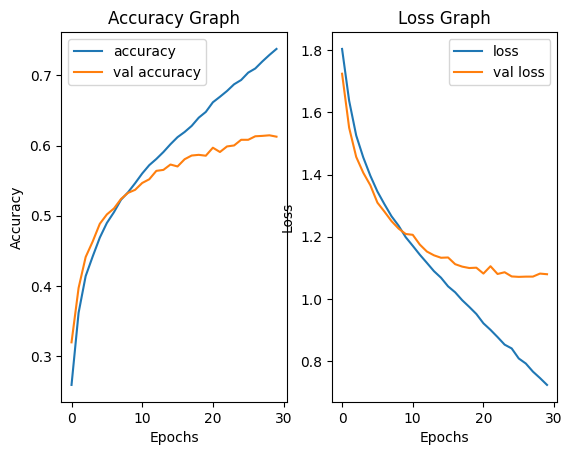

In [ ]:
# Accuracy graph 
plt.subplot(1, 2, 1) 
plt.plot(accuracy, label='accuracy') 
plt.plot(val_accuracy, label='val accuracy') 
plt.title('Accuracy Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
  
# loss graph 
plt.subplot(1, 2, 2) 
plt.plot(loss, label='loss') 
plt.plot(val_loss, label='val loss') 
plt.title('Loss Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
  
plt.show() 

Saving model in JSON:

In [ ]:
model_json = emotion_model.to_json() 
with open(get_model_json_path(dataset=dataset), "w+") as json_file: 
    json_file.write(model_json) 
  
# save trained model weight in .h5 file 
emotion_model.save_weights(get_model_h5_path(dataset=dataset)) 

Take model as JSON and create model using it:

In [ ]:
json_file = open(get_model_json_path(dataset=dataset), 'r') 
loaded_model_json = json_file.read() 
json_file.close() 
emotion_model = model_from_json(loaded_model_json) 

Test the model with the live data (using camera recording):

In [ ]:
# Start capturing video from the default camera (usually the built-in webcam)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    try:
        # Detect faces in the frame
        faces, confidences = cv.detect_face(frame)
    except Exception as e:
        print('Exception on face detection:', e)

    # Loop through detected faces
    for face, confidence in zip(faces, confidences):
        try:
            (start_x, start_y, end_x, end_y) = face

            # Crop the face from the frame
            face_crop = frame[start_y:end_y, start_x:end_x]

            # Resize the face for prediction (adjust the size as needed)
            face_resize = cv2.resize(face_crop, (48, 48))

            # Grayscale the image to fit the training data
            face_grayscale = cv2.cvtColor(face_resize, cv2.COLOR_BGR2GRAY) 

            # Convert the image to NDArray
            face_data = np.expand_dims(np.expand_dims(face_grayscale, -1), 0)

            # Perform emotion prediction
            result = emotion_model.predict(face_data)

            # Make result readable
            prediction = get_emotions(result)

            # Get the dominant emotion
            dominant_emotion = prediction['dominant_emotion']
            emotions = prediction['emotions']

            # Label to show the dominant emotion
            dominant_emotion_label = "Emotion: {}".format(dominant_emotion)

            # Face outline
            cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), (0, 150, 0), 2)

            # Analysis Details
            overlay = frame.copy()

            # Transparent rectangle
            cv2.rectangle(overlay, (end_x, start_y), (end_x + 230, start_y + 200), (192, 192, 192), -1)
            alpha = 0.5

            # Overlay transparent rectangle over the image
            frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

            # Put top label
            cv2.putText(frame, dominant_emotion_label, (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

            # Put emotion list as text
            y_offset = 25
            for key, val in emotions.items():
                cv2.putText(frame, "{}: {:.2f}".format(key, val), (end_x + 10, start_y + y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                y_offset += 25

        except Exception as e:
            print('Exception on face analysis:', e)

    try:
        # Display the resulting frame
        cv2.imshow('Emotion Detection', frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    except Exception as e:
        print('Exception on displaying results:', e)

# Release the capture
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
list_of_weights [8.0504306e-03 4.9913040e-04 2.7758139e-01 1.9652883e-03 1.9204748e-03
 3.7968074e-04 7.0960367e-01]
emotions {'Angry': 0.8050430566072464, 'Disgusted': 0.049913040129467845, 'Fearful': 27.75813937187195, 'Happy': 0.19652883056551218, 'Neutral': 0.19204748095944524, 'Sad': 0.037968074320815504, 'Surprised': 70.96036672592163}
dominant_emotion Surprised
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
list_of_weights [7.8314086e-03 7.0246629e-04 2.4654533e-01 2.3663819e-03 1.6821121e-03
 3.2352438e-04 7.4054879e-01]
emotions {'Angry': 0.7831408642232418, 'Disgusted': 0.07024662918411195, 'Fearful': 24.654532968997955, 'Happy': 0.23663819301873446, 'Neutral': 0.16821121098473668, 'Sad': 0.03235243784729391, 'Surprised': 74.05487895011902}
dominant_emotion Surprised
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
list_of_weights [2.0682444e-03 2.2503985e-04 2.5935584e-01 6.3119829e-04 9.5436710e-04
 8.0046455e-05 7.3668522e-01]
emotions {'Angry': 0.206824

KeyboardInterrupt: 

: 